In [1]:
using LinearAlgebra, PyCall, PyPlot, Crystalline
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/gridsan/aligho/.local/lib/python3.8/site-packages/numpy/__init__.py'>

# C3 Symmetry

In [2]:
function h3b(k::Vector{<:Real}) 
    t_0 = 0.5
    a_1 = [1, 0]
    a_2 = [0, 1]#[1/2, sqrt(3)/2]
    a_3 = a_1 - a_2
    Hk = [0 t_0 + cis(dot(k, a_2)) t_0 + cis(-dot(k, a_3)); t_0 + cis(-dot(k, a_2)) 0 t_0 + cis(-dot(k, a_1)); 
          t_0 + cis(dot(k, a_3)) t_0 + cis(dot(k, a_1)) 0]
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

function h3c(k::Vector{<:Real}) 
    t_0 = 0.5
    a_1 = [1, 0]
    a_2 = [0, 1]#[1/2, sqrt(3)/2]
    a_3 = a_1 - a_2
    Hk = [0 t_0 + cis(dot(k, a_1)) t_0 + cis(dot(k, a_2)); t_0 + cis(-dot(k, a_1)) 0 t_0 + cis(-dot(k, a_3)); 
          t_0 + cis(-dot(k, a_2)) t_0 + cis(dot(k, a_3)) 0]
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

h3c (generic function with 1 method)

In [3]:
kpath = Vector{Float64}[]
N = 100
for i in 1:N
    push!(kpath, 2π*[-1/3, 1/3]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[-1/3, 1/3]+2π*[2/3, 1/3]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[1/3, 2/3]-2π*[1/3, 2/3]*i/N)
end

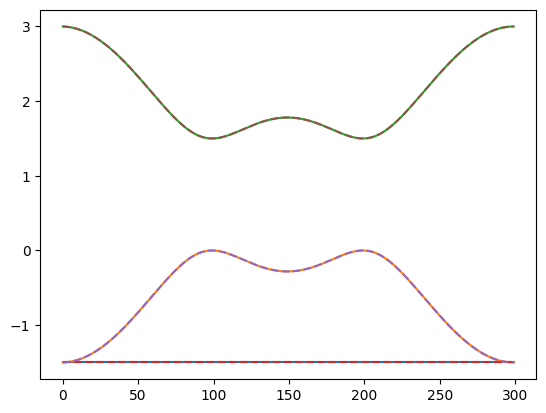

In [4]:
plot([x[1] for x in h3b.(kpath)]);
plot([x[1] for x in h3c.(kpath)], linestyle="dashed");

In [5]:
R3 = [0 0 1; 1 0 0; 0 1 0]
evectors = h3c([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

3-element Vector{ComplexF64}:
 -0.5 + 0.0im
 -0.5 + 0.0im
  1.0 + 0.0im

In [72]:
evectors = h3c(2π*[-1/3, 1/3])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

3-element Vector{ComplexF64}:
 -0.5 + 0.866im
  1.0 - 0.0im
 -0.5 - 0.866im

In [70]:
evectors = h3c(2π*[1/3, 2/3])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

3-element Vector{ComplexF64}:
 -0.5 - 0.866im
  1.0 + 0.0im
 -0.5 + 0.866im

In [62]:
bandreps(13, 2)

BandRepSet (⋕13): 6 BandReps, sampling 8 LGIrreps (spin-1 w/ TR)
──────┬────────────────────────
      │ 1c  1c  1b  1b  1a  1a 
      │ A   E   A   E   A   E  
──────┼────────────────────────
 KA₁  │ ·   1   ·   1   1   ·  
 KA₂  │ 1   ·   ·   1   ·   1  
 KA₃  │ ·   1   1   ·   ·   1  
 Γ₁   │ 1   ·   1   ·   1   ·
 Γ₂Γ₃ │ ·   1   ·   1   ·   1
 K₁   │ ·   1   ·   1   1   ·  
 K₂   │ ·   1   1   ·   ·   1  
 K₃   │ 1   ·   ·   1   ·   1  
──────┼────────────────────────
 μ    │ 1   2   1   2   1   2  
──────┴────────────────────────
  KVecs (maximal only): KA, Γ, K

# C4 Symmetry

In [34]:
# We use the Hamiltonian S88 in https://journals.aps.org/prb/supplemental/10.1103/PhysRevB.99.245151/SuppInfo_after_being_reviewed.pdf

function h4_2b(k::Vector{<:Real})
    t = 0.1
    a_1 = [1, 1]
    a_2 = [1, -1]
    Hk = [0 t cis(dot(k, a_1)) t; t 0 t cis(dot(k, -a_2)); cis(dot(-k, a_1)) t 0 t; t cis(dot(k, a_2)) t 0]
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

h4_2b (generic function with 2 methods)

In [35]:
kpath = Vector{Float64}[]
N = 100
for i in 1:N
    push!(kpath, 2π*[1/2, 0]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[1/2, 0]+2π*[0, 1/2]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[1/2, 1/2]-2π*[1/2, 0]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[0, 1/2]-2π*[0, 1/2]*i/N)
end

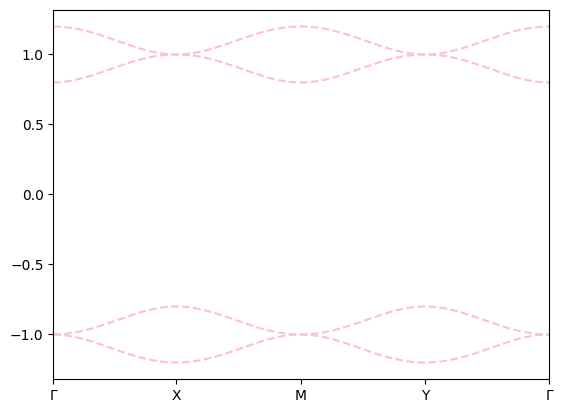

(0.0, 399.0)

In [36]:
plot([x[1] for x in h4_2b.(kpath)], linestyle="dashed", color = "pink");
xticks([0, N-1, 2N-1, 3N-1, 4N-1], ["Γ", "X", "M", "Y", "Γ"])
xlim(0, 4N-1)

In [37]:
R4 = [0 0 0 1; 1 0 0 0; 0 1 0 0; 0 0 1 0]
R2 = R4*R4
evectors = h4_2b([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R4, evectors), digits=3)

4-element Vector{ComplexF64}:
  0.0 + 0.0im
  0.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im

In [38]:
evectors = h4_2b([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
 -1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im

In [39]:
evectors = h4_2b(2π*[1/2, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 - 0.0im
 -1.0 + 0.0im

In [40]:
evectors = h4_2b(2π*[1/2, 1/2])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R4, evectors), digits=3)

4-element Vector{ComplexF64}:
  0.0 - 0.0im
  0.0 + 0.0im
 -1.0 + 0.0im
  1.0 - 0.0im

In [41]:
evectors = h4_2b(2π*[1/2, 1/2])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
 -1.0 + 0.0im
 -1.0 - 0.0im
  1.0 + 0.0im
  1.0 + 0.0im

In [29]:
# From the above, we see that X_1^2 = 2
# Also, M_1^4 = 0 
# Also M_1^2 = 0 

In [30]:
bandreps(10, 2)

BandRepSet (⋕10): 8 BandReps, sampling 8 LGIrreps (spin-1 w/ TR)
──────┬────────────────────────────────
      │ 2c  2c  1b  1b  1b  1a  1a  1a 
      │ A   B   A   B   E   A   B   E  
──────┼────────────────────────────────
 X₁   │ 1   1   ·   ·   2   1   1   ·  
 X₂   │ 1   1   1   1   ·   ·   ·   2  
 M₁   │ ·   1   ·   1   ·   1   ·   ·
 M₂   │ ·   1   1   ·   ·   ·   1   ·
 M₃M₄ │ 1   ·   ·   ·   1   ·   ·   1
 Γ₁   │ 1   ·   1   ·   ·   1   ·   ·  
 Γ₂   │ 1   ·   ·   1   ·   ·   1   ·  
 Γ₃Γ₄ │ ·   1   ·   ·   1   ·   ·   1  
──────┼────────────────────────────────
 μ    │ 2   2   1   1   2   1   1   2  
──────┴────────────────────────────────
  KVecs (maximal only): X, M, Γ

In [33]:
# So we see that the lowest two bands comprise the 1b|E representation

# C2 Symmetry

In [50]:
# We use the Hamiltonian S85 in https://journals.aps.org/prb/supplemental/10.1103/PhysRevB.99.245151/SuppInfo_after_being_reviewed.pdf

function h2_1b(k::Vector{<:Real})
    tx = ty = 0.1
    a_1 = [1, 0]
    a_2 = [0, 1]
    Hk = [0 cis(dot(k, a_1)) 0 cis(dot(k, a_2)); cis(dot(k, -a_1)) 0 cis(dot(k, a_2)) 0; 0 cis(dot(k, -a_2)) 0 cis(dot(k, -a_1)); cis(dot(k, -a_2)) 0 cis(dot(k, a_1)) 0]
    Hk = Hk + [0 tx 0 ty; tx 0 ty 0; 0 ty 0 tx; ty 0 tx 0]
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

h2_1b (generic function with 1 method)

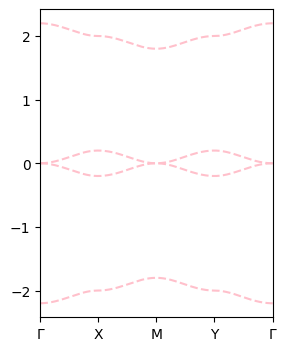

(0.0, 399.0)

In [53]:
figure(figsize=(3, 4))
plot([x[1] for x in h2_1b.(kpath)], linestyle="dashed", color = "pink");
xticks([0, N-1, 2N-1, 3N-1, 4N-1], ["Γ", "X", "M", "Y", "Γ"])
xlim(0, 4N-1)

In [55]:
evectors = h2_1b([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
  1.0 + 0.0im
 -1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im

In [58]:
evectors = h2_1b(2π*[1/2, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im

In [59]:
evectors = h2_1b(2π*[0, 1/2])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im

In [60]:
evectors = h2_1b(2π*[1/2, 1/2])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

4-element Vector{ComplexF64}:
  1.0 + 0.0im
 -1.0 - 0.0im
 -1.0 - 0.0im
  1.0 + 0.0im

In [61]:
bandreps(2, 2)

BandRepSet (⋕2): 8 BandReps, sampling 8 LGIrreps (spin-1 w/ TR)
────┬────────────────────────────────
    │ 1d  1d  1c  1c  1b  1b  1a  1a 
    │ A   B   A   B   A   B   A   B  
────┼────────────────────────────────
 Y₁ │ ·   1   1   ·   ·   1   1   ·  
 Y₂ │ 1   ·   ·   1   1   ·   ·   1  
 B₁ │ ·   1   ·   1   1   ·   1   ·
 B₂ │ 1   ·   1   ·   ·   1   ·   1
 A₁ │ 1   ·   ·   1   ·   1   1   ·  
 A₂ │ ·   1   1   ·   1   ·   ·   1  
 Γ₁ │ 1   ·   1   ·   1   ·   1   ·
 Γ₂ │ ·   1   ·   1   ·   1   ·   1
────┼────────────────────────────────
 μ  │ 1   1   1   1   1   1   1   1  
────┴────────────────────────────────
  KVecs (maximal only): Y, B, A, Γ

In [63]:
#So we see that the lowest band is in the 1d|A representation

# C6 Symmetry

In [72]:
# We use the Hamiltonian S92 in https://journals.aps.org/prb/supplemental/10.1103/PhysRevB.99.245151/SuppInfo_after_being_reviewed.pdf

function h6_4b(k::Vector{<:Real})
    t = 0.5
    a_1 = [1, 0]
    a_2 = [0, 1]
    a_3 = a_1 - a_2
    col1 = [0, t, cis(-dot(k, a_2)), 0, cis(dot(k, a_3)), t]
    col2 = [t, 0, t, cis(dot(k, a_3)), 0, cis(dot(k, a_1))]
    col3 = [cis(dot(k, a_2)), t, 0, t, cis(dot(k, a_1)), 0]
    col4 = [0, cis(dot(k, -a_3)), t, 0, t, cis(dot(k, a_2))]
    col5 = [cis(-dot(k, a_3)), 0, cis(-dot(k, a_1)), t, 0, t]
    col6 = [t, cis(-dot(k, a_1)), 0, cis(-dot(k, a_2)), t, 0]
    Hk = hcat(col1, col2, col3, col4, col5, col6)
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

h6_4b (generic function with 1 method)

In [73]:
kpath = Vector{Float64}[]
N = 100
for i in 1:N
    push!(kpath, 2π*[-1/3, 1/3]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[-1/3, 1/3]+2π*[1/3, 1/2-1/3]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[0, 1/2]-2π*[0, 1/2]*i/N)
end

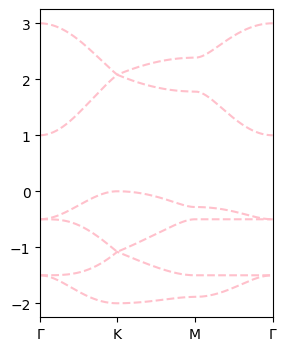

(0.0, 299.0)

In [74]:
figure(figsize=(3, 4))
plot([x[1] for x in h6_4b.(kpath)], linestyle="dashed", color = "pink");
xticks([0, N-1, 2N-1, 3N-1], ["Γ", "K", "M", "Γ"])
xlim(0, 3N-1)

In [78]:
R6 = [0 0 0 0 0 1; 1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 0 0 0 1 0 0; 0 0 0 0 1 0];
R3 = R6^2;
R2 = R6^3;

In [80]:
evectors = h6_4b([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

6-element Vector{ComplexF64}:
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
 -1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im

In [82]:
evectors = h6_4b([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

6-element Vector{ComplexF64}:
 -0.5 + 0.0im
 -0.5 + 0.0im
 -0.5 + 0.0im
 -0.5 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im

In [81]:
evectors = h6_4b(2π*[0, 1/2])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R2, evectors), digits=3)

6-element Vector{ComplexF64}:
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 - 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im

In [83]:
evectors = h6_4b(2π*[-1/3, 1/3])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

6-element Vector{ComplexF64}:
  1.0 + 0.0im
 -0.5 - 0.495im
 -0.5 + 0.495im
  1.0 - 0.0im
 -0.5 + 0.822im
 -0.5 - 0.822im

In [84]:
bandreps(16, 2)

BandRepSet (⋕16): 8 BandReps, sampling 8 LGIrreps (spin-1 w/ TR)
──────┬────────────────────────────────
      │ 3c  3c  2b  2b  1a  1a  1a  1a 
      │ A   B   A   E   A   B   E₁  E₂ 
──────┼────────────────────────────────
 M₁   │ 1   2   1   2   1   ·   2   ·  
 M₂   │ 2   1   1   2   ·   1   ·   2  
 Γ₁   │ 1   ·   1   ·   1   ·   ·   ·
 Γ₂   │ ·   1   1   ·   ·   1   ·   ·
 Γ₃Γ₅ │ 1   ·   ·   1   ·   ·   1   ·
 Γ₄Γ₆ │ ·   1   ·   1   ·   ·   ·   1
 K₁   │ 1   1   ·   2   1   1   ·   ·  
 K₂K₃ │ 1   1   1   1   ·   ·   1   1  
──────┼────────────────────────────────
 μ    │ 3   3   2   4   1   1   2   2  
──────┴────────────────────────────────
  KVecs (maximal only): M, Γ, K

In [88]:
#So we see that the lowest four bands are in the 2b|E representation